## General Topics in This Project

* Bivariate Analysis
* Sunburst and World Map Charts
* Comparison of Features
* Exploratory Data Analysis

## Introduction

* **The Space Race** was a 20th-century competition between two Cold War adversaries, the Soviet Union (USSR) and the United States (US), to achieve superior spaceflight capability. 
* It had its origins in the ballistic missile-based nuclear arms race between the two nations following World War II. 
* The technological advantage demonstrated by spaceflight achievement was seen as necessary for national security, and became part of the symbolism and ideology of the time. The Space Race brought pioneering launches of artificial satellites, robotic space probes to the Moon, Venus, and Mars, and human spaceflight in low Earth orbit and ultimately to the Moon.
* 4 October 1957: The USSR successfully launches Sputnik 1, the first Earth-orbiting satellite in history. 3 November 1957: The USSR successfully launches Sputnik 2, carrying a dog named Laika into space. They become the first nation to successfully send a living organism into orbit.
* Detailed Information: https://nextspaceflight.com/launches/past/?search=
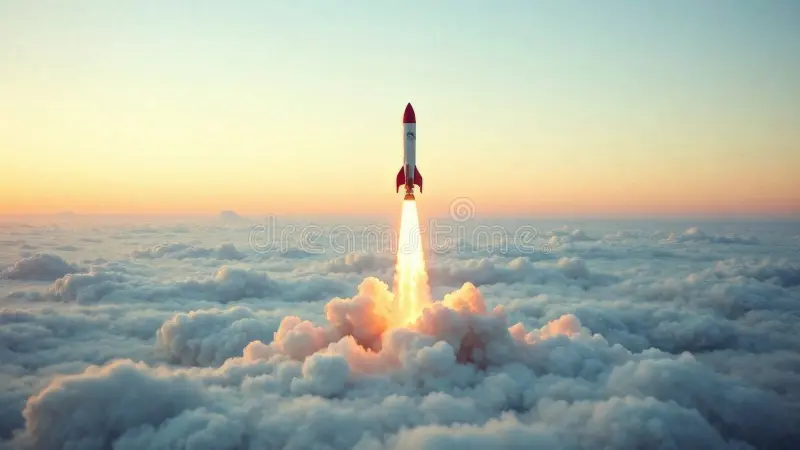

## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analyze of Data](#3)
1. [Number of Launches by Every Company](#4)
1. [Rocket Status](#5)
1. [Mission Status](#6)
1. [Rocket Cost Distribution with Rocket Status](#7)
1. [Rocket Cost Distribution with Mission Status](#8)
1. [Total Spent Money for Each Companies](#9)
1. [Mission Numbers by Year](#10)
1. [Countries and Mission Status](#11)
1. [Sunburst Chart Analysis](#12)
1. [Status Mission by Countries in World Map](#13)
1. [Launch Counts by Countries](#14)
1. [Mission Status by Year](#15)
1. [Conclusion](#16)

<a id = '1'></a>
## Python Libraries

In [1]:
pip install iso3166

Note: you may need to restart the kernel to use updated packages.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import IFrame
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/space-missions/space_missions.csv


<a id = '2'></a>
## Data Content

* **Company:** The company
* **Location:** Location of the launch
* **Date:** Launch date
* **Time:** Launch time
* **Rocket:** Rocket name
* **Mission:** Mission name
* **RocketStatus:** Status of the rocket
* **Price:** Cost of the mission: in $ million
* **MissionStatus:** Status of the mission

<a id = '3'></a>
## Reading and Analyzing of Data

In [3]:
space_mission = pd.read_csv("/kaggle/input/space-missions/space_missions.csv", encoding = "latin1")
df = space_mission.copy()
df.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [4]:
df.describe().T

,count,unique,top,freq
Company,4630,62,RVSN USSR,1777
Location,4630,158,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",251
Date,4630,4180,1962-04-26,4
Time,4503,1300,12:00:00,52
Rocket,4630,370,Cosmos-3M (11K65M),446
Mission,4630,4556,DSP,8
RocketStatus,4630,2,Retired,3620
Price,1265,65,450,136
MissionStatus,4630,4,Success,4162


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


<a id = '4'></a>
## Number of Launches by Every Company

In [6]:
ds = df["Company"].value_counts().reset_index()[:28]
ds

,Company,count
0,RVSN USSR,1777
1,CASC,338
2,Arianespace,293
3,General Dynamics,251
4,VKS RF,216
5,NASA,203
6,SpaceX,182
7,US Air Force,161
8,ULA,151
9,Boeing,136


In [7]:
fig = go.Figure(go.Bar(x = ds["Company"],
                       y = ds["count"],
                       marker = dict(color = "blue",
                                    colorscale = "bluered")))
fig.update_layout(title = "Number of Launches by Every Company", xaxis_title = "Top 28 Country", 
                  yaxis_title = "count", hovermode = "x")
fig.write_html("figure.html")
IFrame("figure.html", width = 900, height = 600)

<a id = '5'></a>
## Rocket Status

In [8]:
ds2 = df["RocketStatus"].value_counts().reset_index()
ds2

,RocketStatus,count
0,Retired,3620
1,Active,1010


In [9]:
fig = px.pie(ds2, values = "count", names = "RocketStatus", title = "Rocket Status")
fig.write_html("figure2.html")
IFrame("figure2.html", width = 900, height = 600)

<a id = '6'></a>
## Mission Status

In [10]:
ds3 = df["MissionStatus"].value_counts().reset_index()[:3]
ds3

,MissionStatus,count
0,Success,4162
1,Failure,357
2,Partial Failure,107


In [11]:
fig = px.bar(ds3, x = "MissionStatus", y = "count", title = "Mission Status")
fig.write_html("figure3.html")
IFrame("figure3.html", width = 900, height = 600)

<a id = '7'></a>
## Rocket Cost Distribution with Rocket Status

In [12]:
np.sum(pd.isna(df.loc[:, "Price"]))

3365

In [13]:
df2 = df.dropna(subset = ["Price"], axis = "rows")
len(df2)

1265

In [14]:
np.sum(pd.isna(df2.loc[:, "Price"]))

0

In [15]:
df2.loc[:, "Price"]

303     63.23
323     63.23
330     63.23
352     63.23
468        59
        ...  
4623     30.8
4624       67
4625       67
4627       67
4629    29.75
Name: Price, Length: 1265, dtype: object

In [16]:
df2.loc[:, "Price"] = df.loc[:, "Price"].fillna("0").str.replace(",", "").astype(np.float64)

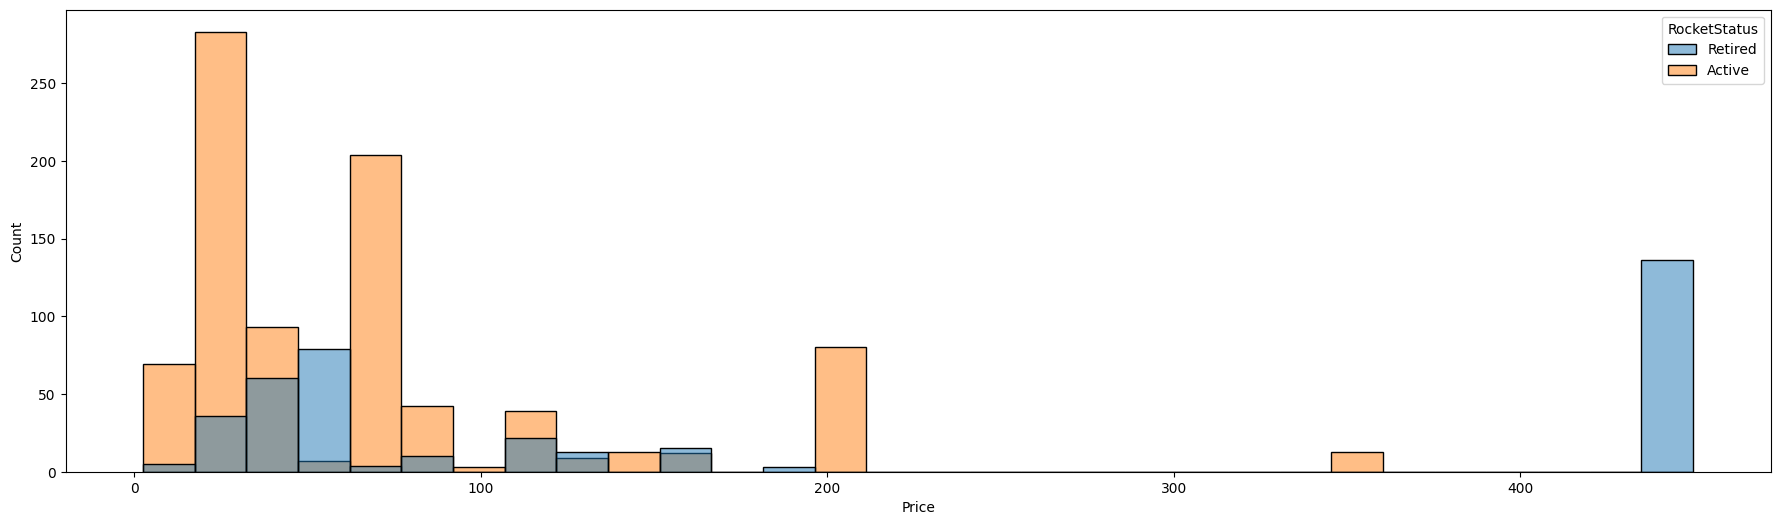

In [17]:
df_d = df2[df2.loc[:, "Price"] < 1000]
plt.figure(figsize = (22, 6))
sns.histplot(data = df_d, x = "Price", hue = "RocketStatus")
plt.show()

<a id = '8'></a>
## Rocket Cost Distribution with Mission Status

In [18]:
np.sum(pd.isna(df.loc[:, "MissionStatus"]))

0

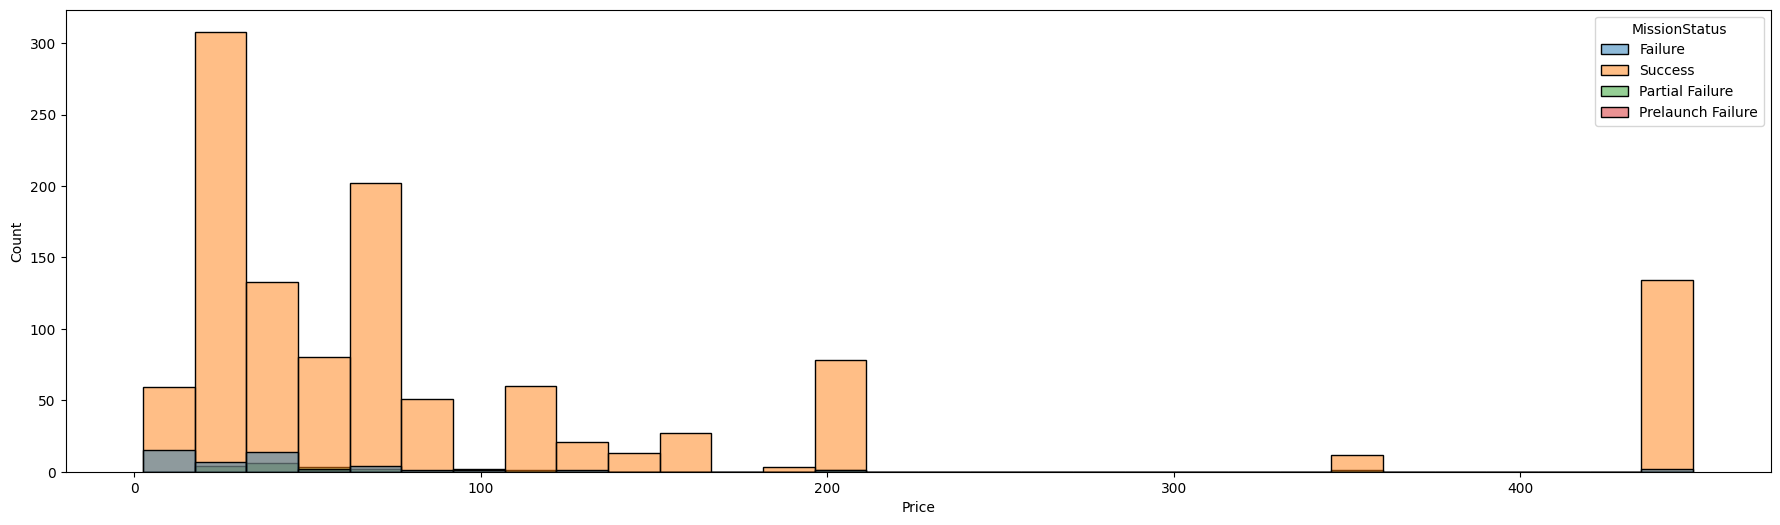

In [19]:
plt.figure(figsize = (22, 6))
sns.histplot(data = df_d, x = "Price", hue = "MissionStatus")
plt.show()

<a id = '9'></a>
## Total Spent Money for Each Companies

In [20]:
df2.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
303,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-09-01,15:00:00,Titan IIIA,Transtage 1,Retired,63.23,Failure
323,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10,16:52:00,Titan IIIA,Transtage 2,Retired,63.23,Success
330,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11,15:19:00,Titan IIIA,LES 1,Retired,63.23,Success
352,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06,15:00:00,Titan IIIA,LES 2 & LCS 1,Retired,63.23,Success
468,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29,18:43:00,Titan IIIB,KH-8,Retired,59.0,Success


In [21]:
df_money = df2.groupby(["Company"])["Price"].sum().reset_index()
df_money = df_money[df_money["Price"] > 0]
df_money.head()

,Company,Price
0,Arianespace,18173.0
1,Astra,17.5
2,Boeing,1241.0
3,CASC,9352.23
4,CASIC,5.8


In [22]:
df_money_ = df_money.sort_values(by = ["Price"], ascending = False)[:15]
df_money_.head()

,Company,Price
19,NASA,76280.0
0,Arianespace,18173.0
27,ULA,16552.0
25,SpaceX,11181.0
21,RVSN USSR,10000.0


In [23]:
fig = px.bar(df_money_, x = "Company", y = "Price", title = "Total Spent Money for each Company")
fig.write_html("figure4.html")
IFrame("figure4.html", width = 900, height = 600)

<a id = '10'></a>
## Mission Numbers by Year

In [24]:
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [25]:
df["Year"] = df["Date"].apply(lambda datetime: datetime.year)
df.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Year
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success,1957
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success,1957
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure,1957
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success,1958
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure,1958


In [26]:
ds4 = df["Year"].value_counts().reset_index()
ds4

,Year,count
0,2021,157
1,2020,119
2,1971,119
3,2018,117
4,1977,114
...,...,...
61,2010,37
62,2005,37
63,1958,28
64,1959,20


In [27]:
fig = px.bar(ds4, x = "Year", y = "count", title = "Missions Number by Year")
fig.write_html("figure5.html")
IFrame("figure5.html", width = 900, height = 600)

<a id = '11'></a>
## Countries and Mission Status

In [28]:
encoder = LabelEncoder()
encoder.fit(df["MissionStatus"])
encoder

LabelEncoder()

In [29]:
colors = {0: "red",
         1: "orange",
         2: "yellow",
         3: "green"}
colors

{0: 'red', 1: 'orange', 2: 'yellow', 3: 'green'}

In [30]:
country_dict = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea':'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
}
df["Country"] = df["Location"].str.split(", ").str[-1].replace(country_dict)
df.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Year,Country
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success,1957,Kazakhstan
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success,1957,Kazakhstan
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure,1957,USA
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success,1958,USA
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure,1958,USA


<a id = '12'></a>
## Sunburst Chart Analysis

In [31]:
countries = df["Country"].unique()
n = len(countries)

rows = cols = int(np.ceil(np.sqrt(n)))  

fig = make_subplots(rows=rows, cols=cols, subplot_titles=countries)

for i, country in enumerate(countries):
    counts = df[df["Country"] == country]["MissionStatus"].value_counts(normalize=True) * 100
    color = [colors[x] for x in encoder.transform(counts.index)]
    trace = go.Bar(x=counts.index, y=counts.values, name=country, marker={"color": color}, showlegend=False)

    row = (i // cols) + 1
    col = (i % cols) + 1
    fig.add_trace(trace, row=row, col=col)

fig.update_layout(title={"text": "Countries and Mission Status"}, height=750, width=975)

for i in range(1, rows + 1):
    fig.update_yaxes(title_text="Percentage", row=i, col=1)

fig.write_html("fig.html")
IFrame("fig.html", width = 975, height = 750)

In [32]:
sun = df.groupby(["Country", "Company", "MissionStatus"])["Date"].count().reset_index()
sun.head()

,Country,Company,MissionStatus,Date
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1


In [33]:
sun = sun[(sun.Country == "USA") | (sun.Country == "China") | (sun.Country == "Russian Federation") | (sun.Country == "France")]
sun.head()

,Country,Company,MissionStatus,Date
7,China,CAS Space,Success,1
8,China,CASC,Failure,14
9,China,CASC,Partial Failure,6
10,China,CASC,Success,318
11,China,CASIC,Failure,2


In [34]:
fig = px.sunburst(sun, path = ["Country", "Company", "MissionStatus"], values = "Date",
                 title = "Sunburst Chart for Some Countries")
fig.write_html("sunburst.html")
IFrame("sunburst.html", width = 900, height = 600)

<a id = '13'></a>
## Status Mission by Countries in World Map

In [35]:
from iso3166 import countries

country_dict = {c.name: c.alpha3 for c in countries}

df["alpha3"] = df["Country"].replace(country_dict)

df.loc[df["Country"] == "North Korea", "alpha3"] = "NKR"
df.loc[df["Country"] == "South Korea", "alpha3"] = "SKR"

df.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Year,Country,alpha3
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success,1957,Kazakhstan,KAZ
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success,1957,Kazakhstan,KAZ
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure,1957,USA,USA
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success,1958,USA,USA
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure,1958,USA,USA


In [36]:
mapdf = df.groupby(["Country", "alpha3"])["MissionStatus"].count().reset_index()
mapdf.head()

,Country,alpha3,MissionStatus
0,Australia,AUS,6
1,Brazil,BRA,3
2,China,CHN,368
3,France,FRA,318
4,India,IND,82


In [37]:
fig = px.choropleth(mapdf, 
                    locations = "alpha3",
                    hover_name = "Country",
                    color = "MissionStatus",
                    title = "Mission Status by Coutries"
                   )
fig.write_html("world_map.html")
IFrame("world_map.html", width = 900, height = 600)

<a id = '14'></a>
### Launch Counts by Countries

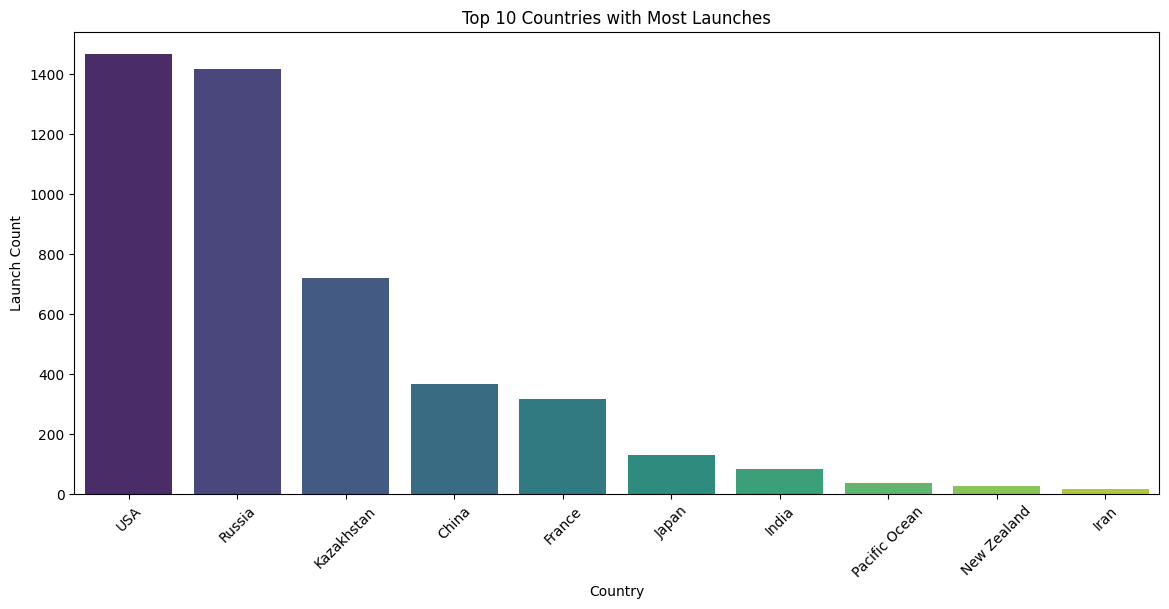

In [38]:
country_counts = df['Location'].apply(lambda x: x.split(',')[-1].strip()).value_counts()
plt.figure(figsize=(14, 6))
sns.barplot(x=country_counts.index[:10], y=country_counts.values[:10], palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Most Launches")
plt.xlabel("Country")
plt.ylabel("Launch Count")
plt.show()

<a id = '15'></a>
## Mission Status by Year

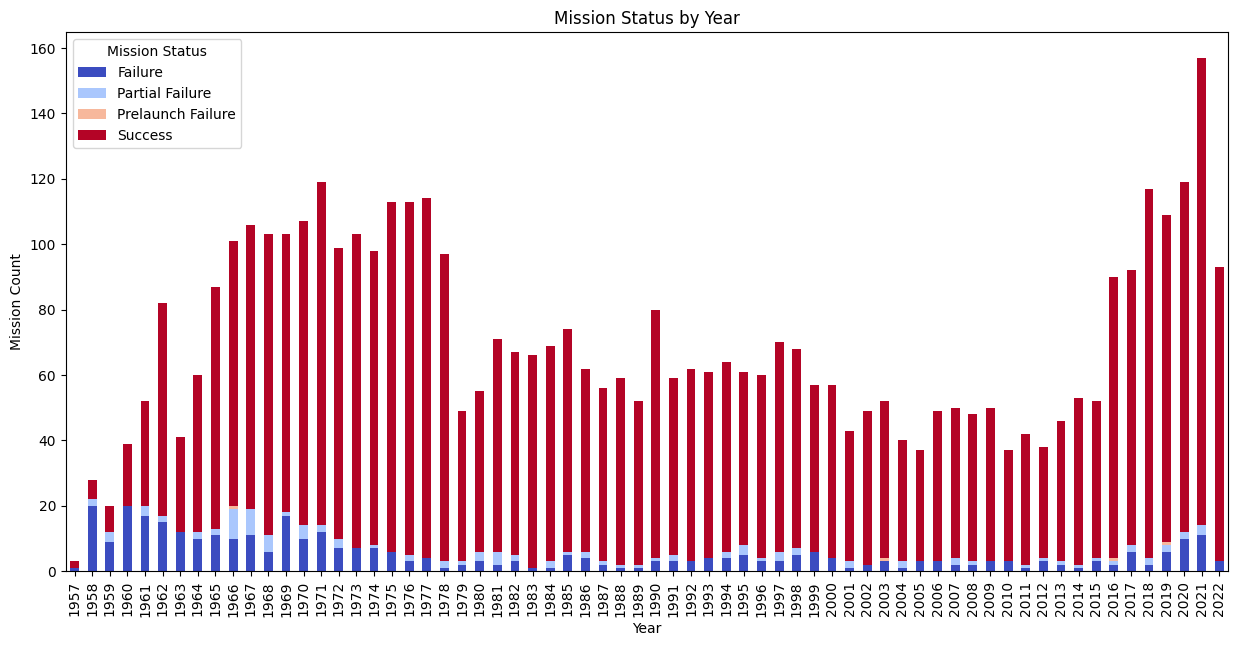

In [39]:
yms = df.groupby(["Year", "MissionStatus"]).size().unstack()
yms.plot(kind = 'bar', stacked = True, figsize = (15, 7), colormap = 'coolwarm')
plt.title("Mission Status by Year")
plt.xlabel("Year")
plt.ylabel("Mission Count")
plt.legend(title="Mission Status")
plt.show()

<a id = '16'></a>
## Conclusion
* In this analysis, the space missions that happened between 1957 and 2022 has been observed. Some prominent analyzes include:
    1. A Soviet Russian company named RVSN USSR has the most launch value in every other company.
    2. Most of the rockets are retired
    3. Most of the missions has completed successfully.
    4. The price of the vast majority of rockets are between 0 - 200 million $
    5. Comparison of total spent money for each company
    6. In 1971 Mission Numbers has a local max point. That mean in that year The Cold War between           USA and USSR could become more contentious
    7. Countries and their mission status in percentage
    8. Russian Federation, USA, China and Kazakhstan are the top countries with the most space              missions in the world
    9. When mission statuses were analyzed by year, it was observed that there were fluctuations in         the number of failed missions, especially in certain years, and that space research was more         successful in some periods. 